In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
coffee = pd.read_excel("CoffeeSales(Raw_Data).xlsx")

In [4]:
coffee.head(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [6]:
coffee.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [7]:
coffee['transaction_time']=coffee['transaction_time'].astype('str')
coffee['transaction_time'] = pd.to_timedelta(coffee['transaction_time'])

In [8]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   transaction_id    149116 non-null  int64          
 1   transaction_date  149116 non-null  datetime64[ns] 
 2   transaction_time  149116 non-null  timedelta64[ns]
 3   transaction_qty   149116 non-null  int64          
 4   store_id          149116 non-null  int64          
 5   store_location    149116 non-null  object         
 6   product_id        149116 non-null  int64          
 7   unit_price        149116 non-null  float64        
 8   product_category  149116 non-null  object         
 9   product_type      149116 non-null  object         
 10  product_detail    149116 non-null  object         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4), timedelta64[ns](1)
memory usage: 12.5+ MB


In [9]:
coffee['sales']  = coffee['transaction_qty'] * coffee['unit_price']

In [10]:
coffee.head(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


In [11]:
coffee['datetime'] = coffee['transaction_date'] + coffee['transaction_time']

In [12]:
coffee.head(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,datetime
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01-01 07:06:11
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:08:56
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01-01 07:14:04
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01-01 07:20:24
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:22:41


In [13]:
coffee.describe()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,product_id,unit_price,sales,datetime
count,149116.000000,149116,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116
mean,74737.371872,2023-04-15 11:50:32.173609984,0 days 12:14:15.815794415,1.438276,5.342063,47.918607,3.382219,4.686367,2023-04-16 00:04:47.989404160
min,1.000000,2023-01-01 00:00:00,0 days 06:00:00,1.000000,3.000000,1.000000,0.800000,0.800000,2023-01-01 07:06:11
25%,37335.750000,2023-03-06 00:00:00,0 days 09:05:10.500000,1.000000,3.000000,33.000000,2.500000,3.000000,2023-03-06 13:37:08
50%,74727.500000,2023-04-24 00:00:00,0 days 11:15:28,1.000000,5.000000,47.000000,3.000000,3.750000,2023-04-24 08:24:32.500000
75%,112094.250000,2023-05-30 00:00:00,0 days 15:25:57,2.000000,8.000000,60.000000,3.750000,6.000000,2023-05-30 07:16:13
max,149456.000000,2023-06-30 00:00:00,0 days 20:59:32,8.000000,8.000000,87.000000,45.000000,360.000000,2023-06-30 20:57:19
std,43153.600016,NaN,0 days 03:45:57.901686173,0.542509,2.074241,17.930020,2.658723,4.227099,NaN


In [14]:
coffee_loc = coffee.groupby('store_location').agg({'sales':'sum','transaction_id':'count'})

In [15]:
coffee_loc

,sales,transaction_id
store_location,,
Astoria,232243.91,50599
Hell's Kitchen,236511.17,50735
Lower Manhattan,230057.25,47782


In [16]:
sales_by_loc= coffee.groupby(['transaction_date','store_location'])['sales'].sum().unstack()
# Unstacks a level of the DataFrame's multi-index, creating new columns from the index labels.

In [17]:
sales_by_loc

store_location,Astoria,Hell's Kitchen,Lower Manhattan
transaction_date,,,
2023-01-01,868.40,851.45,788.35
2023-01-02,925.50,828.80,649.05
2023-01-03,902.75,906.25,756.00
2023-01-04,808.25,781.65,630.20
2023-01-05,903.05,714.90,800.90
...,...,...,...
2023-06-26,1975.10,1746.10,2154.70
2023-06-27,1861.55,1676.70,2437.40
2023-06-28,1758.10,1445.85,1524.95


In [18]:
# without using unstack()
a = coffee.groupby(['transaction_date','store_location'])['sales'].sum()
a

transaction_date  store_location 
2023-01-01        Astoria             868.40
                  Hell's Kitchen      851.45
                  Lower Manhattan     788.35
2023-01-02        Astoria             925.50
                  Hell's Kitchen      828.80
                                      ...   
2023-06-29        Hell's Kitchen     1298.55
                  Lower Manhattan    1299.45
2023-06-30        Astoria            1807.65
                  Hell's Kitchen     1904.93
                  Lower Manhattan    1768.74
Name: sales, Length: 543, dtype: float64

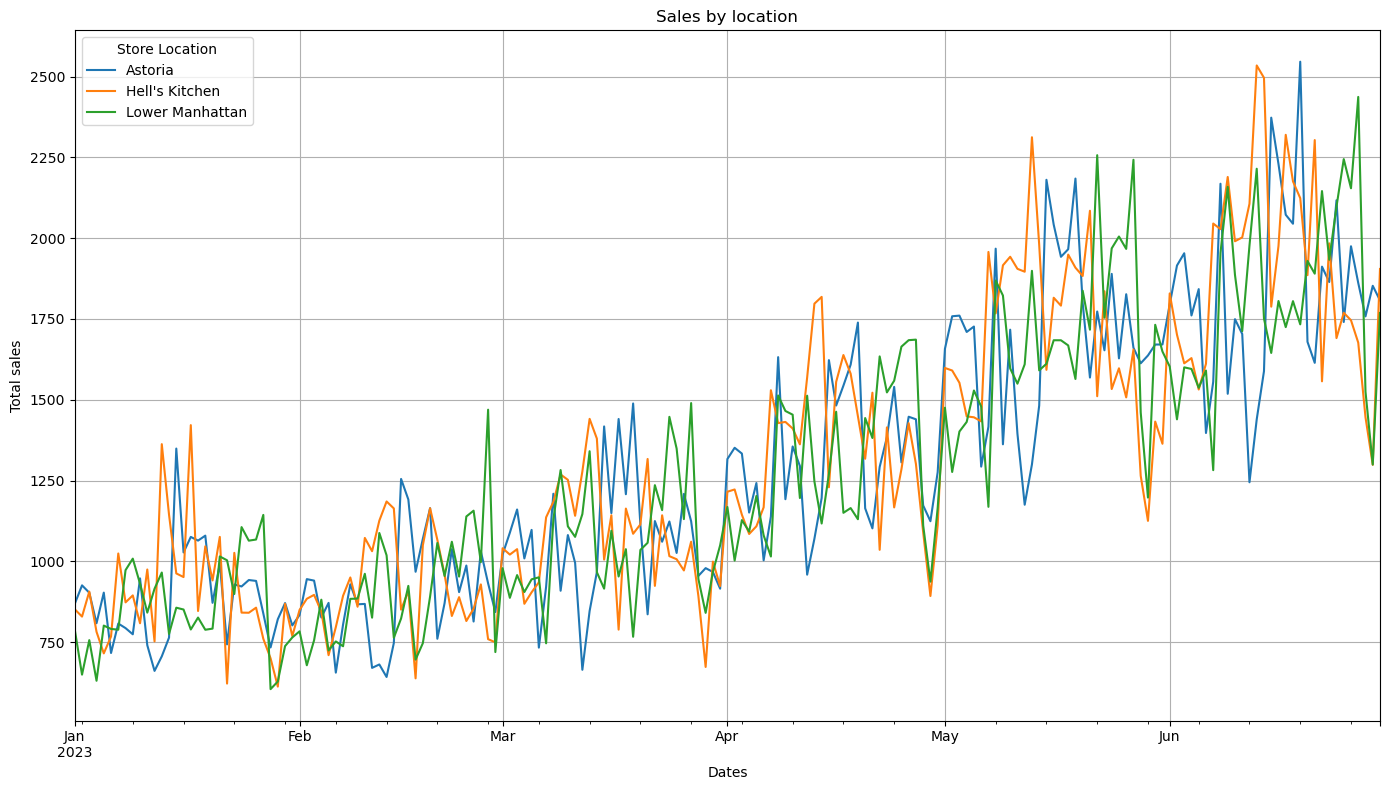

In [19]:
sales_by_loc.plot(figsize=(14,8)),
plt.xlabel("Dates"),
plt.ylabel('Total sales'),
plt.legend(title = "Store Location"),
plt.title('Sales by location'),
plt.grid(True),
plt.tight_layout(),
plt.show()

In [20]:
daily_sales = coffee.groupby('transaction_date')['sales'].sum().reset_index()

In [21]:
daily_sales

,transaction_date,sales
0,2023-01-01,2508.20
1,2023-01-02,2403.35
2,2023-01-03,2565.00
3,2023-01-04,2220.10
4,2023-01-05,2418.85
...,...,...
176,2023-06-26,5875.90
177,2023-06-27,5975.65
178,2023-06-28,4728.90
179,2023-06-29,4450.75


In [22]:
coffee['day_of_week'] = coffee['datetime'].dt.day_name()
weekly_sales = coffee.groupby('day_of_week')['sales'].sum()

In [23]:
coffee.head(5)
weekly_sales

day_of_week
Friday       101373.00
Monday       101677.28
Saturday      96894.48
Sunday        98330.31
Thursday     100767.78
Tuesday       99455.94
Wednesday    100313.54
Name: sales, dtype: float64

In [24]:
weekly_sales = coffee.groupby('day_of_week')['sales'].sum().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
]).reset_index()

In [25]:
weekly_sales

,day_of_week,sales
0,Monday,101677.28
1,Tuesday,99455.94
2,Wednesday,100313.54
3,Thursday,100767.78
4,Friday,101373.00
5,Saturday,96894.48
6,Sunday,98330.31


In [26]:
coffee['month'] = coffee['datetime'].dt.to_period("M")
monthly_sales = coffee.groupby('month')['sales'].sum().reset_index()
monthly_sales

,month,sales
0,2023-01,81677.74
1,2023-02,76145.19
2,2023-03,98834.68
3,2023-04,118941.08
4,2023-05,156727.76
5,2023-06,166485.88


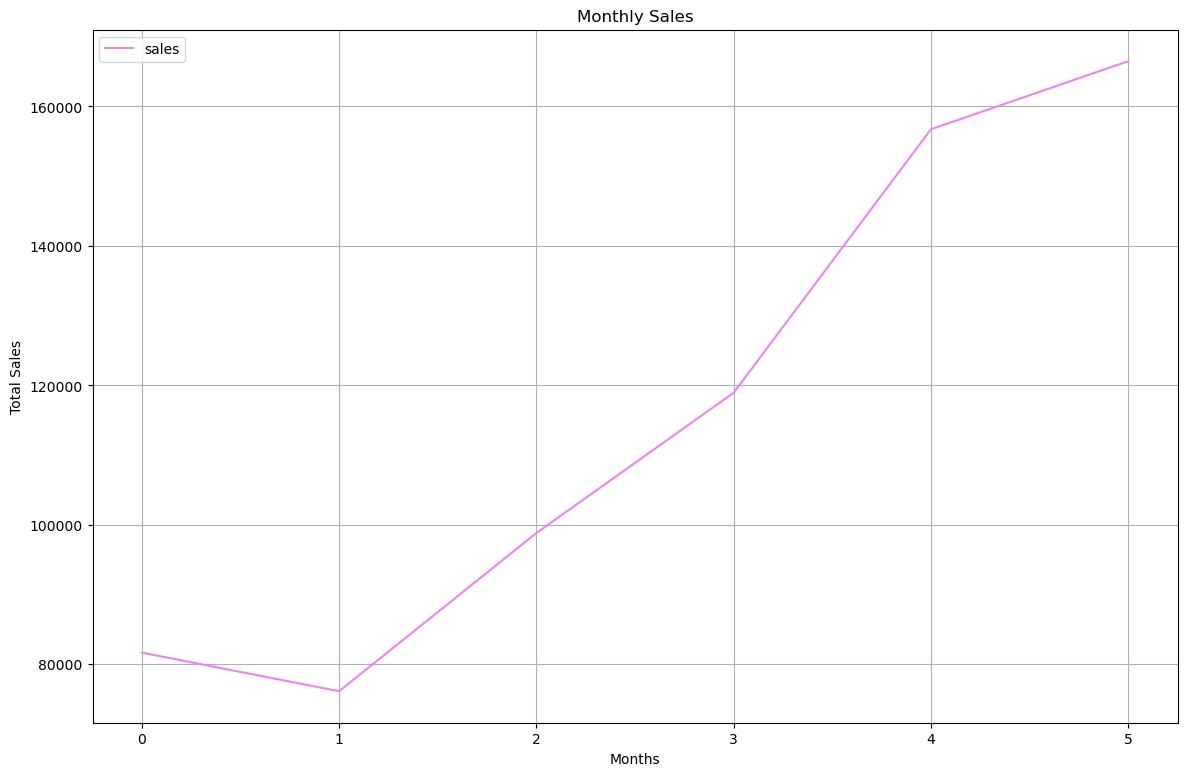

In [27]:
monthly_sales.plot(figsize=(14,9),color = 'violet'),
plt.xlabel('Months'),
plt.ylabel('Total Sales'),
plt.grid(True),
plt.title('Monthly Sales'),
plt.show()

In [28]:
weekly_sales = coffee.groupby(['day_of_week','store_location'])['sales'].sum().unstack()
day_orders = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekly_sales = weekly_sales.reindex(day_orders)

<Figure size 1000x600 with 0 Axes>

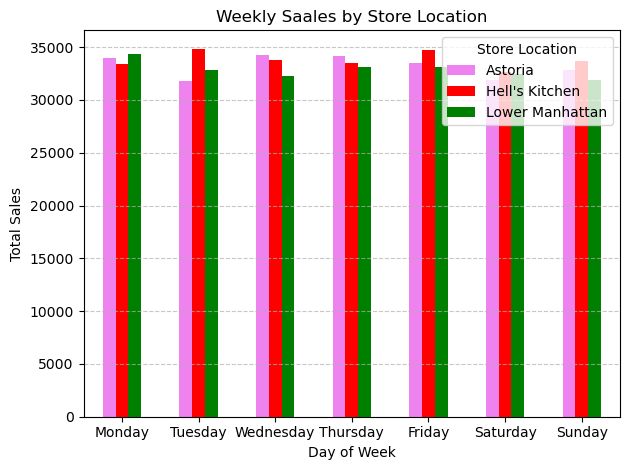

In [29]:
plt.figure(figsize=(10, 6))
colors = ['Violet','red','green']
weekly_sales.plot(kind='bar', color = colors,stacked=False)
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.title('Weekly Saales by Store Location')
plt.legend(title='Store Location')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

In [30]:
coffee.head(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,datetime,day_of_week,month
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01-01 07:06:11,Sunday,2023-01
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:08:56,Sunday,2023-01
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01-01 07:14:04,Sunday,2023-01
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01-01 07:20:24,Sunday,2023-01
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:22:41,Sunday,2023-01


In [31]:
category = coffee.groupby('product_category').agg({'sales':'sum','transaction_id':'count'}).sort_values('sales',ascending = False)

In [32]:
category

,sales,transaction_id
product_category,,
Coffee,269952.45,58416
Tea,196405.95,45449
Bakery,82315.64,22796
Drinking Chocolate,72416.00,11468
Coffee beans,40085.25,1753
Branded,13607.00,747
Loose Tea,11213.60,1210
Flavours,8408.80,6790
Packaged Chocolate,4407.64,487


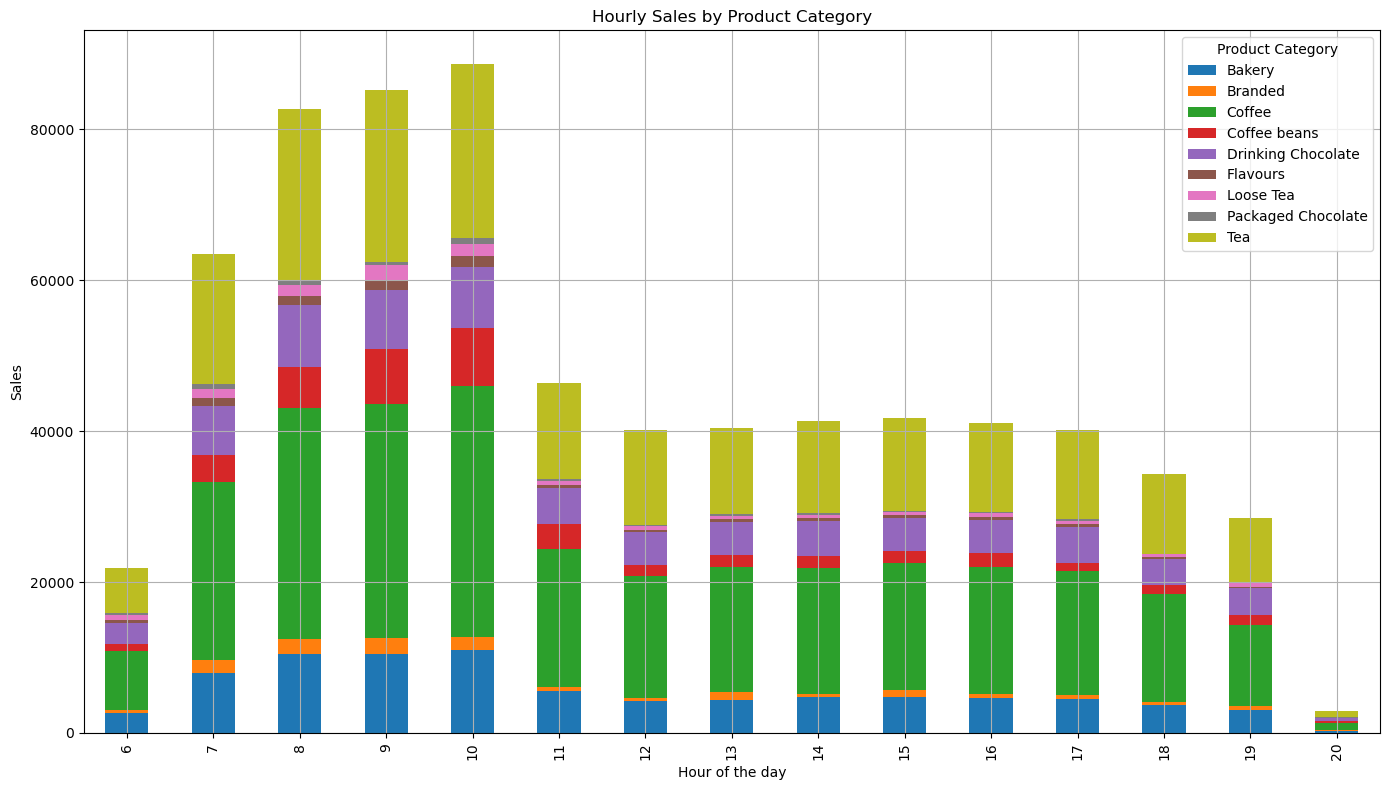

In [33]:
coffee['hr'] = coffee['datetime'].dt.hour
hr_sales_by_Product = coffee.groupby(['hr','product_category'])['sales'].sum().unstack()
hr_sales_by_Product.plot(kind = 'bar',stacked = True,figsize=(14,8))
plt.title('Hourly Sales by Product Category')
plt.xlabel('Hour of the day')
plt.ylabel('Sales')
plt.legend(title = 'Product Category',loc = 'upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
category['avg_sales'] = category['sales']/category['transaction_id']
category

,sales,transaction_id,avg_sales
product_category,,,
Coffee,269952.45,58416,4.621207
Tea,196405.95,45449,4.321458
Bakery,82315.64,22796,3.610969
Drinking Chocolate,72416.00,11468,6.314615
Coffee beans,40085.25,1753,22.866657
Branded,13607.00,747,18.215529
Loose Tea,11213.60,1210,9.267438
Flavours,8408.80,6790,1.238409
Packaged Chocolate,4407.64,487,9.050595


In [35]:
coffee.head()
sales_by_product = coffee.groupby('product_type').agg({'sales':'sum','unit_price':'mean'}).sort_values('sales',ascending = True)

In [36]:
sales_by_product

,sales,unit_price
product_type,,
Green beans,1340.00,10.000000
Green tea,1470.75,9.250000
Organic Chocolate,1679.60,7.600000
Sugar free syrup,2324.00,0.800000
Black tea,2711.85,8.950000
Drinking Chocolate,2728.04,10.255789
Herbal tea,2729.75,8.950000
House blend Beans,3294.00,18.000000
Chai tea,4301.25,9.709368


In [37]:
product_sales = coffee.groupby(['product_category','product_type'])['sales'].sum().reset_index()

In [38]:
product_sales

,product_category,product_type,sales
0,Bakery,Biscotti,19793.53
1,Bakery,Pastry,25655.99
2,Bakery,Scone,36866.12
3,Branded,Clothing,6163.00
4,Branded,Housewares,7444.00
5,Coffee,Barista Espresso,91406.20
6,Coffee,Drip coffee,31984.00
7,Coffee,Gourmet brewed coffee,70034.60
8,Coffee,Organic brewed coffee,37746.50
9,Coffee,Premium brewed coffee,38781.15


In [39]:
coffee.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,datetime,day_of_week,month,hr
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01-01 07:06:11,Sunday,2023-01,7
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:08:56,Sunday,2023-01,7
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01-01 07:14:04,Sunday,2023-01,7
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01-01 07:20:24,Sunday,2023-01,7
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:22:41,Sunday,2023-01,7
